# New Zealand Airfare Analysis

# Objective

In this notebook, data of New Zealand Airfare will be explored by:
1. The trend of NZ Airfare by month
2. The highest Airfare by Airlines
3. The highest Airfare by Location

# Setting Up Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

%matplotlib inline

# Import Data

In [2]:
nzairfare = pd.read_csv('NZ airfares.csv')

In [3]:
nzairfare.head()

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133


In [5]:
nzairfare.tail()

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422
162832,18/12/2019,ZQN,9:35 AM,WLG,6:10 PM,8h 35m,(1 stop),5h 35m in AKL,NaN,Air New Zealand,422


In [7]:
#Shape of the dataset
nzairfare.shape

(162833, 11)

In [8]:
#Number of columns present in the dataset
nzairfare.columns

Index(['Travel Date', 'Dep. airport', 'Dep. time', 'Arr. airport', 'Arr. time',
       'Duration', 'Direct', 'Transit', 'Baggage', 'Airline', 'Airfare(NZ$)'],
      dtype='object')

In [9]:
#Concise summary of the dataset
nzairfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162833 entries, 0 to 162832
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Travel Date   162833 non-null  object
 1   Dep. airport  162809 non-null  object
 2   Dep. time     162833 non-null  object
 3   Arr. airport  162809 non-null  object
 4   Arr. time     162828 non-null  object
 5   Duration      162833 non-null  object
 6   Direct        162833 non-null  object
 7   Transit       123077 non-null  object
 8   Baggage       2311 non-null    object
 9   Airline       162828 non-null  object
 10  Airfare(NZ$)  162833 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 13.7+ MB


In [10]:
#Checking missing value
nzairfare.isnull().sum()

Travel Date          0
Dep. airport        24
Dep. time            0
Arr. airport        24
Arr. time            5
Duration             0
Direct               0
Transit          39756
Baggage         160522
Airline              5
Airfare(NZ$)         0
dtype: int64

In [36]:
#Summary of statistics dataset
nzairfare.describe()

,Airfare(NZ$)
count,162833.000000
mean,411.031769
std,168.958742
min,32.000000
25%,293.000000
50%,392.000000
75%,512.000000
max,1364.000000


From the above summary, we need to revise the duration, direct, baggage & transit columns need to be deleted as is not related to the analysis afterwards. However, the missing value is ignored as the airfare shows none missing value because we are focusing on the airfares.

# Data Audit

1. Departure & Arrival airport and airline has missing values

In [97]:
#Delete the unrelated columns
nzairfareupdated = nzairfare.drop(nzairfare.columns[5:9], axis = 1)
nzairfareupdated

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,Air New Zealand,133
...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,Air New Zealand,422


In [98]:
#Concise summary of the updated dataset
nzairfareupdated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162833 entries, 0 to 162832
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Travel Date   162833 non-null  object
 1   Dep. airport  162809 non-null  object
 2   Dep. time     162833 non-null  object
 3   Arr. airport  162809 non-null  object
 4   Arr. time     162828 non-null  object
 5   Airline       162828 non-null  object
 6   Airfare(NZ$)  162833 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.7+ MB


In [99]:
#Summary of statistics updated dataset
nzairfareupdated.describe()

,Airfare(NZ$)
count,162833.000000
mean,411.031769
std,168.958742
min,32.000000
25%,293.000000
50%,392.000000
75%,512.000000
max,1364.000000


# 1. The trend of NZ Airfare by month

In [29]:
nzairfareupdated['Travel Date'].min()

'1/10/2019'

In [30]:
nzairfareupdated['Travel Date'].max()

'9/12/2019'

In [44]:
#Change the data type for 'Travel Date' from object to datetime
nzairfareupdated['Travel Date'] = pd.to_datetime(nzairfareupdated['Travel Date'])
nzairfareupdated

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Airline,Airfare(NZ$)
0,2019-09-19,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),Jetstar,111
1,2019-09-19,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),Jetstar,111
2,2019-09-19,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),Jetstar,132
3,2019-09-19,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),Jetstar,132
4,2019-09-19,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),Air New Zealand,133
...,...,...,...,...,...,...,...,...,...
162828,2019-12-18,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),Air New Zealand,422
162829,2019-12-18,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),Air New Zealand,422
162830,2019-12-18,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),Air New Zealand,422
162831,2019-12-18,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),Air New Zealand,422


In [45]:
#Getting month year from the dataset
nzairfareupdated['Month-Year'] = nzairfareupdated['Travel Date'].apply(lambda x: x.strftime('%Y-%m'))

In [46]:
nzairfareupdated['Month-Year']

0         2019-09
1         2019-09
2         2019-09
3         2019-09
4         2019-09
           ...   
162828    2019-12
162829    2019-12
162830    2019-12
162831    2019-12
162832    2019-12
Name: Month-Year, Length: 162833, dtype: object

In [95]:
#Grouping Month-Year
nztrend = nzairfareupdated.groupby('Month-Year').sum()['Airfare(NZ$)'].reset_index()
nztrend

,Month-Year,Airfare(NZ$)
0,2019-01,1981611
1,2019-02,2086784
2,2019-03,2223886
3,2019-04,1967581
4,2019-05,2122069
5,2019-06,2159296
6,2019-07,2249499
7,2019-08,2248410
8,2019-09,11889041
9,2019-10,17243206


In [96]:
nztrend.sort_values(["Airfare(NZ$)"],ascending=False)

,Month-Year,Airfare(NZ$)
9,2019-10,17243206
10,2019-11,15941390
8,2019-09,11889041
11,2019-12,4816763
6,2019-07,2249499
7,2019-08,2248410
2,2019-03,2223886
5,2019-06,2159296
4,2019-05,2122069
1,2019-02,2086784


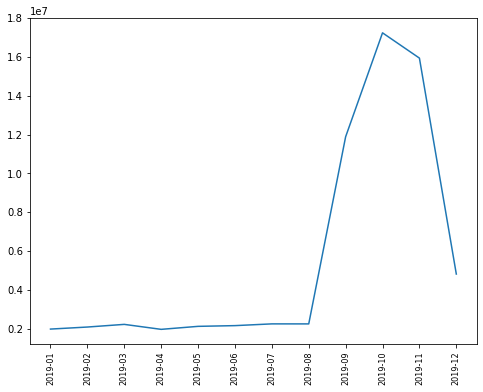

In [59]:
#Settting figure size
plt.figure(figsize=(8,6))
plt.plot(nztrend["Month-Year"], nztrend["Airfare(NZ$)"])
plt.xticks(rotation='vertical',size=8)
plt.show()

# 2. The highest Airfare by Airlines

In [101]:
#Grouping by airlines
nzairlines = nzairfareupdated.groupby('Airline').sum()['Airfare(NZ$)'].reset_index()
nzairlines.sort_values(["Airfare(NZ$)"],ascending=False)

,Airline,Airfare(NZ$)
0,Air New Zealand,65929963
1,Jetstar,770529
2,Sounds Air,228305


# 3. The highest Airfare by Location

In [82]:
#Grouping by departure airport & arrival airport
nzdep = nzairfareupdated.groupby(["Dep. airport","Arr. airport"]).sum()['Airfare(NZ$)'].reset_index()
nzdep

,Dep. airport,Arr. airport,Airfare(NZ$)
0,AKL,CHC,2278423
1,AKL,DUD,2023535
2,AKL,NPE,2608854
3,AKL,NPL,1995341
4,AKL,NSN,1963681
5,AKL,PMR,2204617
6,AKL,WLG,2252599
7,AKL,ZQN,2092657
8,CHC,AKL,2441694
9,CHC,DUD,2541051


In [100]:
nzdep.sort_values(["Airfare(NZ$)"],ascending=False)

,Dep. airport,Arr. airport,Airfare(NZ$)
2,AKL,NPE,2608854
27,ZQN,NPE,2585980
9,CHC,DUD,2541051
13,CHC,PMR,2487023
30,ZQN,PMR,2484537
8,CHC,AKL,2441694
10,CHC,NPE,2440053
19,WLG,NPE,2366555
26,ZQN,DUD,2311782
29,ZQN,NSN,2301473
